In [7]:
import pandas as pd

crimes_data_pd = pd.read_csv('crimes_2020-2024.csv')
weather_data = pd.read_csv('chicago_weather_2020-01-01_to_2024-04-30.csv')
crimes_data_pd['Date'] = pd.to_datetime(crimes_data_pd['Date'], format='%m/%d/%Y %I:%M:%S %p')
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
joined_data = pd.merge(crimes_data_pd, weather_data, how='left', left_on='Date', right_on='datetime')
joined_data['Date'] = joined_data['Date'].dt.strftime('%Y-%m-%d')
joined_data.drop(columns=['datetime'], inplace=True)
joined_data = joined_data[(joined_data['Date'] >= '2020-01-01') & (joined_data['Date'] <= '2024-04-30')]

columns_to_keep = ['Date', 'Block', 'Primary Type', 'District', 'Latitude', 'Longitude', 
                   'tempmin', 'temp', 'tempmax', 'humidity', 'precip', 'snowdepth', 'visibility', 
                   'cloudcover', 'windspeed', 'winddir', 'severerisk', 'sunrise', 'sunset', 
                   'moonphase', 'precipprob', 'precipcover', 'preciptype', 'snow']
joined_data = joined_data[columns_to_keep]

print(joined_data.columns)
print(joined_data.head(5))


Index(['Date', 'Block', 'Primary Type', 'District', 'Latitude', 'Longitude',
       'tempmin', 'temp', 'tempmax', 'humidity', 'precip', 'snowdepth',
       'visibility', 'cloudcover', 'windspeed', 'winddir', 'severerisk',
       'sunrise', 'sunset', 'moonphase', 'precipprob', 'precipcover',
       'preciptype', 'snow'],
      dtype='object')
         Date                   Block             Primary Type  District  \
0  2024-04-06  073XX S SOUTH SHORE DR                  BATTERY         3   
1  2024-04-06     074XX S LANGLEY AVE            OTHER OFFENSE         3   
2  2024-04-06    059XX N WINTHROP AVE          CRIMINAL DAMAGE        24   
3  2024-04-06      035XX N WILTON AVE                    THEFT        19   
4  2024-04-06  008XX W WELLINGTON AVE  CRIMINAL SEXUAL ASSAULT        19   

    Latitude  Longitude  tempmin  temp  tempmax  humidity  ...  windspeed  \
0  41.763341 -87.559903      0.9   6.1     11.1      56.2  ...       19.5   
1  41.759776 -87.607873      0.9   6.1     11

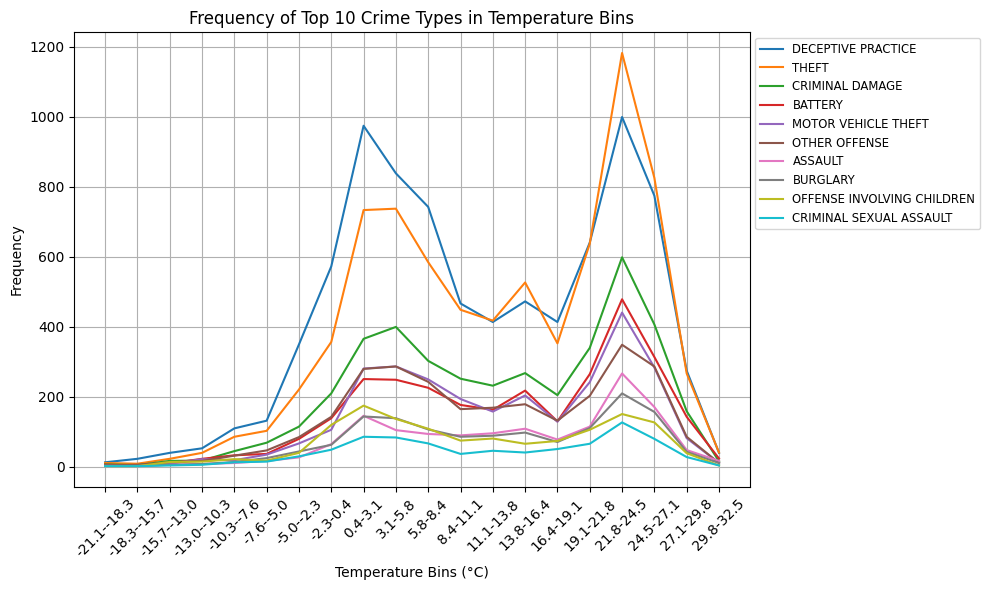

In [188]:
import matplotlib.pyplot as plt

joined_data['temperature_bin'] = pd.cut(joined_data['temp'], bins=20)
primary_type_frequencies = joined_data.groupby(['temperature_bin', 'Primary Type']).size().unstack(fill_value=0)
primary_type_frequencies.reset_index(inplace=True)
top_10_types = primary_type_frequencies.drop(columns=['temperature_bin']).sum().nlargest(10).index
primary_type_frequencies = primary_type_frequencies[['temperature_bin'] + list(top_10_types)]
primary_type_frequencies['temperature_bin_str'] = primary_type_frequencies['temperature_bin'].apply(lambda x: f"{x.left:.1f}-{x.right:.1f}")

plt.figure(figsize=(10, 6))
for col in primary_type_frequencies.columns:
    if col not in ['temperature_bin', 'temperature_bin_str']:
        plt.plot(primary_type_frequencies['temperature_bin_str'], primary_type_frequencies[col], label=col)

plt.title('Frequency of Top 10 Crime Types in Temperature Bins')
plt.xlabel('Temperature Bins (°C)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small') 
plt.grid(True)
# plt.yscale('log')
plt.tight_layout()
plt.show()


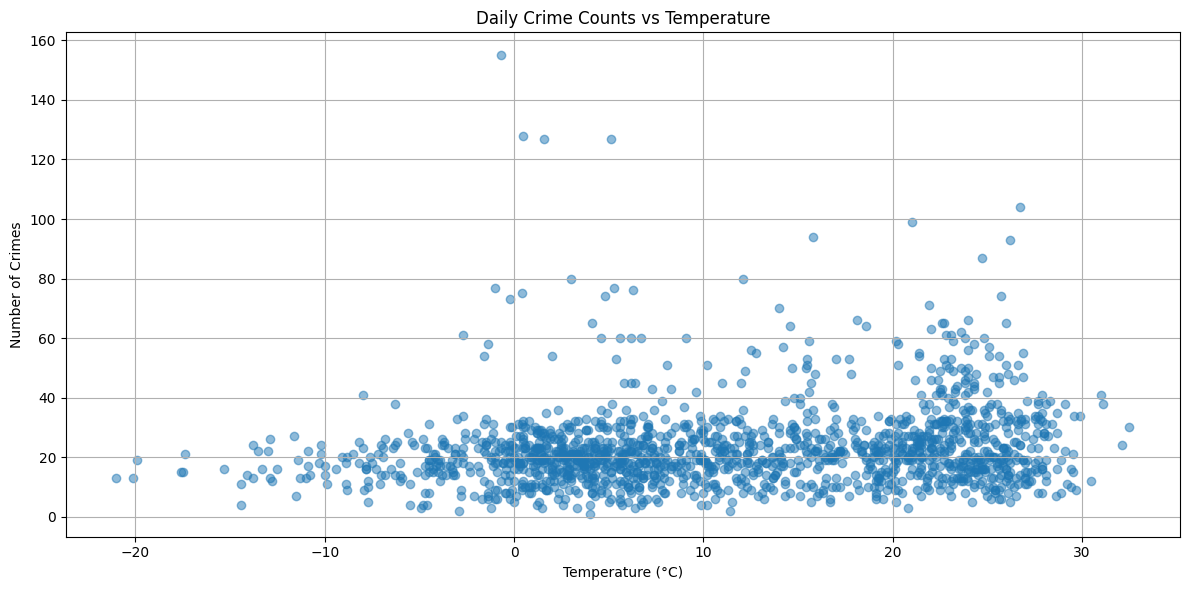

In [193]:
import matplotlib.pyplot as plt

daily_temperature_crime_counts = joined_data.groupby(['Date', 'temp']).size().reset_index(name='Crime Count')

plt.figure(figsize=(12, 6))
plt.scatter(daily_temperature_crime_counts['temp'], daily_temperature_crime_counts['Crime Count'], alpha=0.5)
plt.title('Daily Crime Counts vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()


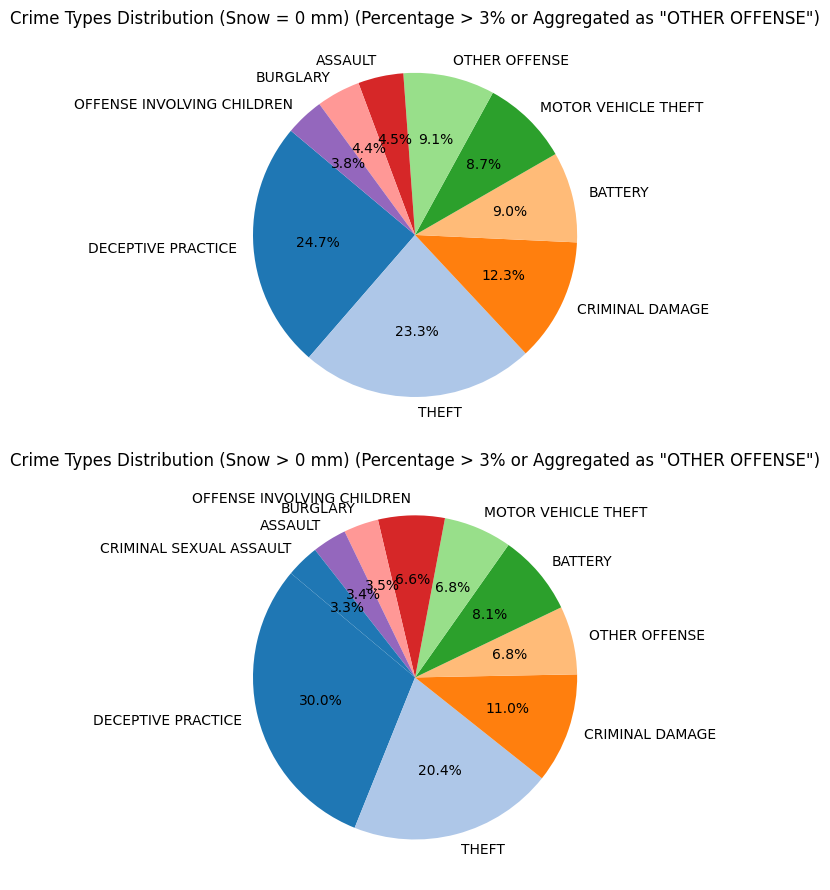

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

snow_0_data = joined_data[joined_data['snow'] == 0]
snow_gt_0_data = joined_data[joined_data['snow'] > 0]
snow_0_type_counts = snow_0_data['Primary Type'].value_counts()
snow_gt_0_type_counts = snow_gt_0_data['Primary Type'].value_counts()

threshold = 0.03

snow_0_type_counts['OTHER OFFENSE'] = snow_0_type_counts[snow_0_type_counts / len(snow_0_data) <= threshold].sum()
snow_0_type_counts = snow_0_type_counts[snow_0_type_counts / len(snow_0_data) > threshold]
snow_gt_0_type_counts['OTHER OFFENSE'] = snow_gt_0_type_counts[snow_gt_0_type_counts / len(snow_gt_0_data) <= threshold].sum()
snow_gt_0_type_counts = snow_gt_0_type_counts[snow_gt_0_type_counts / len(snow_gt_0_data) > threshold]
palette = sns.color_palette('tab20', len(snow_0_type_counts))

fig, axes = plt.subplots(2, 1, figsize=(18, 9))

axes[0].pie(snow_0_type_counts, labels=snow_0_type_counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
axes[0].set_title('Crime Types Distribution (Snow = 0 mm) (Percentage > 3% or Aggregated as "OTHER OFFENSE")')
axes[1].pie(snow_gt_0_type_counts, labels=snow_gt_0_type_counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
axes[1].set_title('Crime Types Distribution (Snow > 0 mm) (Percentage > 3% or Aggregated as "OTHER OFFENSE")')

plt.tight_layout()
plt.show()


/var/folders/s4/w3qjlk3s1m97mr6wx7yh95qh0000gn/T/ipykernel_91090/1676867706.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(primary_type_frequencies[joined_data['precip'] < max_precip]['precip_bin_str'], primary_type_frequencies[col], label=col)
/var/folders/s4/w3qjlk3s1m97mr6wx7yh95qh0000gn/T/ipykernel_91090/1676867706.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(primary_type_frequencies[joined_data['precip'] < max_precip]['precip_bin_str'], primary_type_frequencies[col], label=col)
/var/folders/s4/w3qjlk3s1m97mr6wx7yh95qh0000gn/T/ipykernel_91090/1676867706.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(primary_type_frequencies[joined_data['precip'] < max_precip]['precip_bin_str'], primary_type_frequencies[col], label=col)
/var/folders/s4/w3qjlk3s1m97mr6wx7yh95qh0000gn/T/ipykernel_91090/1676867706.py:25: UserWarning: Boolean Series key will be r

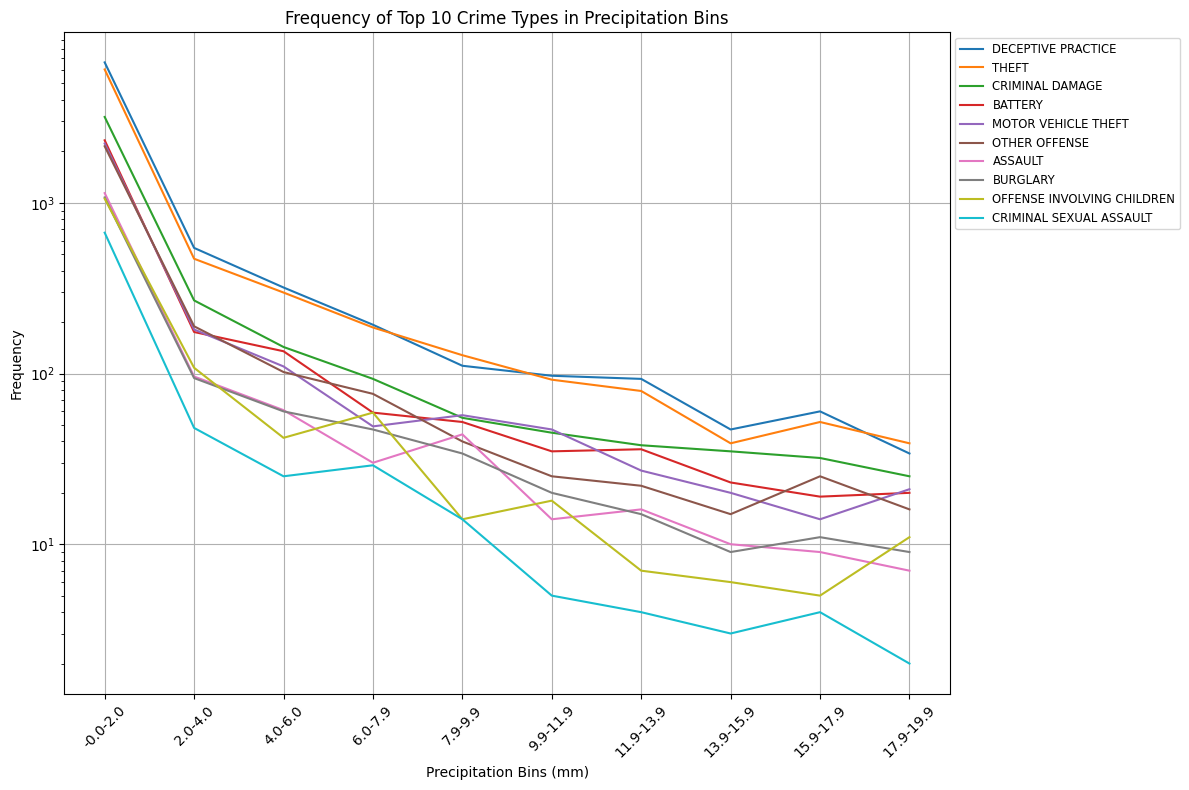

In [183]:
import matplotlib.pyplot as plt

max_precip = 20
joined_data['precip_bin'] = pd.cut(joined_data[joined_data['precip'] < max_precip]['precip'], bins=10)

primary_type_frequencies = joined_data[joined_data['precip'] < max_precip].groupby(['precip_bin', 'Primary Type']).size().unstack(fill_value=0)
primary_type_frequencies.reset_index(inplace=True)
top_10_types = primary_type_frequencies.drop(columns=['precip_bin']).sum().nlargest(10).index
primary_type_frequencies = primary_type_frequencies[['precip_bin'] + list(top_10_types)]
primary_type_frequencies['precip_bin_str'] = primary_type_frequencies['precip_bin'].apply(lambda x: f"{x.left:.1f}-{x.right:.1f}")

plt.figure(figsize=(12, 8))
for col in primary_type_frequencies.columns:
    if col not in ['precip_bin', 'precip_bin_str']:
        plt.plot(primary_type_frequencies[joined_data['precip'] < max_precip]['precip_bin_str'], primary_type_frequencies[col], label=col)

plt.title('Frequency of Top 10 Crime Types in Precipitation Bins')
plt.xlabel('Precipitation Bins (mm)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')  
plt.grid(True)
plt.yscale('log') 
plt.tight_layout()
plt.show()


In [1]:
import matplotlib.pyplot as plt

max_precip = 20

joined_data['precip_bin'] = pd.cut(joined_data[joined_data['precip'] < max_precip]['precip'], bins=10)
primary_type_frequencies = joined_data[joined_data['precip'] < max_precip].groupby(['precip_bin', 'Primary Type']).size().unstack(fill_value=0)
primary_type_frequencies.reset_index(inplace=True)
top_10_types = primary_type_frequencies.drop(columns=['precip_bin']).sum().nlargest(10).index
primary_type_frequencies = primary_type_frequencies[['precip_bin'] + list(top_10_types)]
primary_type_frequencies['precip_bin_str'] = primary_type_frequencies['precip_bin'].apply(lambda x: f"{x.left:.1f}-{x.right:.1f}")

for idx, row in primary_type_frequencies.iterrows():
    total_count = row[top_10_types].sum()
    primary_type_frequencies.loc[idx, top_10_types] = (row[top_10_types] / total_count) * 100

plt.figure(figsize=(8, 6))
for col in top_10_types:
    plt.plot(primary_type_frequencies['precip_bin_str'], primary_type_frequencies[col], label=col)

plt.title('Percentage of Top 10 Crime Types in Precipitation Bins (Normalized to 100%)')
plt.xlabel('Precipitation Bins (mm)')
plt.ylabel('Percentage of Total')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'pd' is not defined

In [ ]:
import matplotlib.pyplot as plt

max_precip = 20

joined_data['precip_bin'] = pd.cut(joined_data[joined_data['precip'] < max_precip]['precip'], bins=10)
primary_type_frequencies = joined_data[joined_data['precip'] < max_precip].groupby(['precip_bin', 'Primary Type']).size().unstack(fill_value=0)

primary_type_frequencies.reset_index(inplace=True)
top_10_types = primary_type_frequencies.drop(columns=['precip_bin']).sum().nlargest(10).index
primary_type_frequencies = primary_type_frequencies[['precip_bin'] + list(top_10_types)]
primary_type_frequencies['precip_bin_str'] = primary_type_frequencies['precip_bin'].apply(lambda x: f"{x.left:.1f}-{x.right:.1f}")

for idx, row in primary_type_frequencies.iterrows():
    total_count = row[top_10_types].sum()
    primary_type_frequencies.loc[idx, top_10_types] = (row[top_10_types] / total_count) * 100

plt.figure(figsize=(8, 6))
for col in top_10_types:
    plt.plot(primary_type_frequencies['precip_bin_str'], primary_type_frequencies[col], label=col)

plt.title('Percentage of Top 10 Crime Types in Precipitation Bins (Normalized to 100%)')
plt.xlabel('Precipitation Bins (mm)')
plt.ylabel('Percentage of Total')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small') 
plt.grid(True)
plt.tight_layout()
plt.show()
